## MeshPy short guide

### How to install
[Read here](http://documen.tician.de/meshpy/installation.html)
### Documentation
[You can find here](http://documen.tician.de/meshpy/)


###  Writing to file

In [5]:
def write_dat(mesh,facets,f):
    if type(f) is str:
            f = open(f, 'w')
    mesh_points = np.array(mesh.points)
    mesh_tris = np.array(mesh.elements)
    p_count = mesh_points.shape[0]
    t_count = mesh_tris.shape[0]
    f_count = len(facets)
    f.write(str(p_count))    
    f.write('\n') 
    for i in xrange(p_count):
        f.write(str(mesh_points[i][0]))
        f.write(' ')
        f.write(str(mesh_points[i][1]))
        f.write('\n') 
    f.write(str(t_count))
    f.write('\n')
    for i in xrange(t_count):
        f.write(str(mesh_tris[i][0]))
        f.write(' ')
        f.write(str(mesh_tris[i][1]))
        f.write(' ')
        f.write(str(mesh_tris[i][2]))
        f.write('\n')  
    f.write(str(f_count))
    f.write('\n')
    for i in xrange(f_count):
        f.write(str(facets[i][0]))
        f.write(' ')
        f.write(str(facets[i][1]))
        f.write('\n')  

### Example of usage

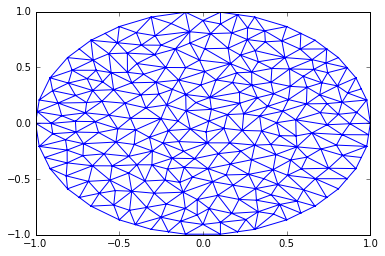

In [81]:
import scipy as sp
from scipy import io
import meshpy.triangle as triangle
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt
def round_trip_connect(start, end):
    result = []
    for i in range(start, end):
        result.append((i, i+1))
    result.append((end, start))
    return result

# Points list defines boundary
points = []
points.extend((np.cos(angle),  np.sin(angle)) for angle in np.linspace(0, 2*np.pi, 30, endpoint=False))


info = triangle.MeshInfo()
info.set_points(points)
info.set_facets(round_trip_connect(0, len(points)-1))

#Here you build mesh
mesh = triangle.build(info, max_volume=1e-2, min_angle=25)

#You can save it to file:
#write_dat(mesh,round_trip_connect(0, len(points)-1),'circle.dat')
#triangle.write_gnuplot_mesh("circle.dat", mesh)

mesh_points = np.array(mesh.points)
mesh_tris = np.array(mesh.elements)
mesh_facets = np.array(mesh.facets)

#write_dat(mesh,facets,'circle0.dat')
pt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
pt.show()

### Two circles example

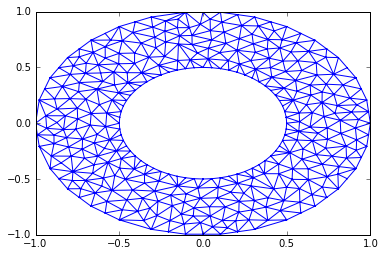

In [82]:
from __future__ import division
from __future__ import absolute_import
%matplotlib inline
import meshpy.triangle as triangle
import numpy as np
import numpy.linalg as la
from six.moves import range


def round_trip_connect(start, end):
    return [(i, i+1) for i in range(start, end)] + [(end, start)]


def main():
    points = []
    points.extend((0.5 * np.cos(angle)+0.0, 0.5 * np.sin(angle)) for angle in np.linspace(0, 2*np.pi, 60, endpoint=False))
    facets = round_trip_connect(0, len(points)-1)

    circ_start = len(points)
    points.extend(
            (1 * np.cos(angle), 1 * np.sin(angle))
            for angle in np.linspace(0, 2*np.pi, 30, endpoint=False))

    facets.extend(round_trip_connect(circ_start, len(points)-1))

    def needs_refinement(vertices, area):
        bary = np.sum(np.array(vertices), axis=0)/3
        max_area = 0.001 + (la.norm(bary, np.inf)-1)*0.01
        return bool(area > max_area)

    info = triangle.MeshInfo()
    info.set_points(points)
    info.set_holes([(0.0, 0)])
    info.set_facets(facets)
    #print facets
    
    mesh = triangle.build(info,max_volume=6e-3)#, refinement_func=needs_refinement)
    write_dat(mesh,facets,'circle2.dat')
#    triangle.write_gnuplot_mesh("circle2.dat", mesh)
    
    mesh_points = np.array(mesh.points)
    mesh_tris = np.array(mesh.elements)
    mesh_facets = np.array(mesh.facets)

    import matplotlib.pyplot as pt
    pt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
    pt.show()

if __name__ == "__main__":
    main()


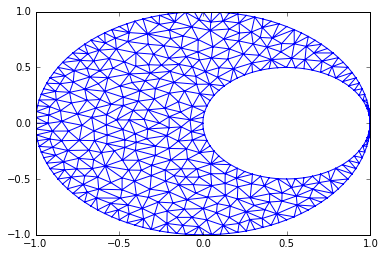

In [83]:
from __future__ import division
from __future__ import absolute_import
%matplotlib inline
import meshpy.triangle as triangle
import numpy as np
import numpy.linalg as la
from six.moves import range


def round_trip_connect(start, end):
    return [(i, i+1) for i in range(start, end)] + [(end, start)]


def main():
    r = 0.5
    x_position = 0.5
    y_position = 0.0
    x_shift = 0.499
    
    points = []
    points.extend((r * np.cos(angle)+x_shift, r * np.sin(angle)) for angle in np.linspace(0, 2*np.pi, 60, endpoint=False))
    facets = round_trip_connect(0, len(points)-1)

    circ_start = len(points)
    points.extend(
            (1 * np.cos(angle), 1 * np.sin(angle))
            for angle in np.linspace(0, 2*np.pi, 120, endpoint=False))

    facets.extend(round_trip_connect(circ_start, len(points)-1))

    def needs_refinement(vertices, area):
        bary = np.sum(np.array(vertices), axis=0)/3
        max_area = 0.001 + (la.norm(bary, np.inf)-1)*0.01
        return bool(area > max_area)

    info = triangle.MeshInfo()
    info.set_points(points)
    info.set_holes([(x_position+0.3, y_position)])
    info.set_facets(facets)

    mesh = triangle.build(info,max_volume=6e-3)#, refinement_func=needs_refinement)
    
    #triangle.write_gnuplot_mesh("circle3.dat", mesh,facets=True)
    write_dat(mesh,facets,'circle3.dat')
    mesh_points = np.array(mesh.points)
    mesh_tris = np.array(mesh.elements)
    mesh_facets = np.array(mesh.facets)
    
    #np.savetxt('test.dat',(mesh_tris,mesh_points))
    #print np.array(mesh_tris.shape[0])
    #mesh_points.tofile('test.dat', sep="", format="%s")
    #mesh_tris.tofile('test.dat', sep=" ", format="%s")
    #np.savetxt('test.dat', np.array(mesh_tris.shape[0]))
    
    #sp.io.mmwrite('test.dat',mesh_tris)
    out = [mesh_tris.shape[0],mesh_points,mesh_tris]
    #np.savetxt('test.dat', out)
    #print [mesh_tris.shape[0]]
    #np.savetxt('test.dat', mesh_tris)
    #np.savetxt('test.dat', mesh_points)
    import matplotlib.pyplot as pt
    pt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
    pt.show()

if __name__ == "__main__":
    main()

### Rearing from file

In [9]:
def read_dat(f):
    if type(f) is str:
            f = open(f, 'r')
    points = []
    n_points = int(f.readline())
    #print f.readline()
    for i in xrange(n_points):
        pp = f.readline().split(' ')
        points.append([float(pp[0]),float(pp[1])])
    n_tris = int(f.readline())
    tris = []
    for i in xrange(n_tris):
        tt = f.readline().split(' ')
        tris.append([int(tt[0]),int(tt[1]),int(tt[2])])
    facets = []
    n_facets = int(f.readline())
    for i in xrange(n_facets):
        ff = f.readline().split(' ')
        facets.append((int(ff[0]),int(ff[1])))
        
    return np.array(points), np.array(tris),np.array(facets)

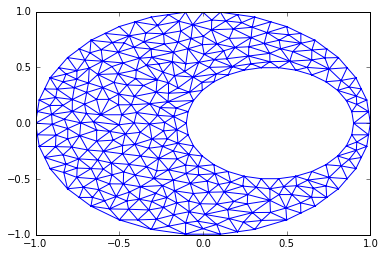

In [10]:
mp, mt, mf = read_dat('circle3.dat') #circle.dat, circle2.dat, circle3.dat
pt.triplot(mp[:, 0], mp[:, 1], mt)
pt.show()
#print mf

## Solution of the prePS2

In [11]:
    points = []
    points.extend((0.5 * np.cos(angle)+0.0, 0.5 * np.sin(angle)) for angle in np.linspace(0, 2*np.pi, 30, endpoint=False))
    facets = round_trip_connect(0, len(points)-1)

    circ_start = len(points)
    points.extend(
            (1 * np.cos(angle), 1 * np.sin(angle))
            for angle in np.linspace(0, 2*np.pi, 30, endpoint=False))

    facets.extend(round_trip_connect(circ_start, len(points)-1))

    def needs_refinement(vertices, area):
        bary = np.sum(np.array(vertices), axis=0)/3
        max_area = 0.001 + (la.norm(bary, np.inf)-1)*0.01
        return bool(area > max_area)

    info = triangle.MeshInfo()
    info.set_points(points)
    info.set_holes([(0.0, 0)])
    info.set_facets(facets)
    #print facets
    
    mesh = triangle.build(info,max_volume=6e-3)#, refinement_func=needs_refinement)
    write_dat(mesh,facets,'circle2.dat')
    #triangle.write_gnuplot_mesh("circle2.dat", mesh)
    
    mesh_points = np.array(mesh.points)
    mesh_tris = np.array(mesh.elements)
    mesh_facets = np.array(mesh.facets)



In [12]:
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg


def stiff_matr_3d(triag, points):
    r1 = points[triag[0]]
    r2 = points[triag[1]]
    r3 = points[triag[2]]
    S_T = 0.5 * ((r2[0] - r1[0]) * (r3[1] - r1[1]) - (r2[1] - r1[1]) * (r3[0] - r1[0]))
    
    G = np.ones((3, 3))
    G[1:, 0] = r1
    G[1:, 1] = r2
    G[1:, 2] = r3
    G = np.linalg.solve(G, np.array([[0, 0], [1, 0], [0, 1]]))
    
    M = G.dot(G.T) * S_T/2
    
    return M


def fem_solve(mesh_points, mesh_tris, mesh_facets):
    
#    mesh_points, mesh_tris, mesh_facets = read_dat(file_name)
#    mesh_tris = np.array(mesh.elements)
#    mesh_facets = np.array(mesh.facets)
#    mesh_points = np.array(mesh.points)
#    mesh_tris = np.array(mesh.elements)
#    mesh_facets = np.array(mesh.facets)

    b = np.zeros(mesh_points.shape[0])

    A = sp.sparse.lil_matrix((mesh_points.shape[0], mesh_points.shape[0]))
    for triag in mesh_tris:
        M = stiff_matr_3d(triag, mesh_points)
        for k in xrange(3):
            for l in xrange(3):
                A[triag[k], triag[l]] += M[k, l]


    for triag in mesh_tris:
        r1 = mesh_points[triag[0]]
        r2 = mesh_points[triag[1]]
        r3 = mesh_points[triag[2]]
        S_T = 0.5 * ((r2[0] - r1[0]) * (r3[1] - r1[1]) - (r2[1] - r1[1]) * (r3[0] - r1[0]))

        for k in xrange(3):
            b[triag[k]] += 1./3 * S_T

    for i in mesh_facets[:, 0]:
        A[i, :] = 0
        A[:, i] = 0
        A[i, i] = 1.
        b[i] = 0
    
    A = sp.sparse.csc_matrix(A)
    sol = sp.sparse.linalg.spsolve(A, b)
        
    return sol



In [5]:
def integrate_over_mesh(mp, mt, sol):
    return 'you should implement it yourself :)'

In [90]:
mp, mt, mf = read_dat('circle2.dat')

sol = fem_solve(mp, mt, mf)
#mesh_points, mesh_tris, mesh_facets = read_dat('circle.dat')

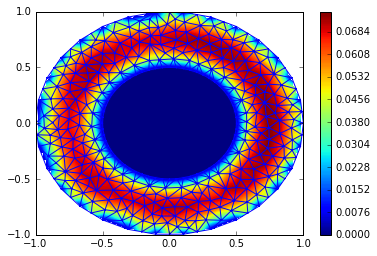

In [91]:
%matplotlib inline
import matplotlib.mlab as mlab
pt.triplot(mp[:, 0], mp[:, 1], mt)
xi = np.linspace(-1, 1, 100) 
yi = np.linspace(-1, 1, 100)
z = mlab.griddata(mp[:, 0], mp[:, 1], sol, xi, yi, interp='linear')
pt.contourf(xi, yi, z, 200)
pt.colorbar()

In [3]:
s2 = integrate_over_mesh(mp, mt, sol)

In [93]:
s1

3.4810643439896403e-05